In [3]:
from tensorflow.keras.models import Sequential  #모델 만들기
from tensorflow.keras.layers import Dense  #모델의 층을 추가하기위한 라이브러리
import numpy as np
import pandas as pd

In [4]:
Data_set = np.loadtxt("datadl2/ThoraricSurgery3.csv", delimiter=",")
X = Data_set[:,0:16]
y = Data_set[:,16] #외과수술을 한이후로 1년이내 사망을했는가?

In [6]:
Data_set.shape

(470, 17)

In [7]:
y

array([0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0.

In [15]:
model = Sequential() #모델 생성

In [16]:
model.add(Dense(30,input_dim=16, activation='relu')) #모델에 레이어추가
model.add(Dense(1, activation='sigmoid')) #사망 예측하므로 sigmoid함수 출력1

In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #모델만드는거

In [18]:
model.fit(X, y, epochs=10, batch_size=16) #모델실행
#batch_size높을수록 빨라지지만, 메모리문제 생길수 있다, 학습이 잘 안될 수 있다

Epoch 1/10
30/30 [==============================] - 0s 1ms/step - loss: 4.6314 - accuracy: 0.8511 
Epoch 2/10
30/30 [==============================] - 0s 1ms/step - loss: 3.0705 - accuracy: 0.8489
Epoch 3/10
30/30 [==============================] - 0s 1ms/step - loss: 1.5561 - accuracy: 0.8319
Epoch 4/10
30/30 [==============================] - 0s 1ms/step - loss: 0.5596 - accuracy: 0.8106
Epoch 5/10
30/30 [==============================] - 0s 1ms/step - loss: 0.4853 - accuracy: 0.8255
Epoch 6/10
30/30 [==============================] - 0s 1ms/step - loss: 0.4710 - accuracy: 0.8277
Epoch 7/10
30/30 [==============================] - 0s 1ms/step - loss: 0.4542 - accuracy: 0.8319
Epoch 8/10
30/30 [==============================] - 0s 1ms/step - loss: 0.4555 - accuracy: 0.8340
Epoch 9/10
30/30 [==============================] - 0s 1ms/step - loss: 0.4497 - accuracy: 0.8362
Epoch 10/10
30/30 [==============================] - 0s 1ms/step - loss: 0.4504 - accuracy: 0.8319


In [ ]:
#model.predict()

In [ ]:
# 예측모델

In [19]:
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

In [21]:
mx = np.mean(x)

my = np.mean(y)

print("x의 평균값:", mx)
print("y의 평균값:", my)

x의 평균값: 5.0
y의 평균값: 90.5


In [24]:
x

array([2, 4, 6, 8])

In [25]:
divisor = sum([(i - mx)**2 for i in x]) #표준편차 제곱근 rmse
divisor

20.0

In [22]:
divisor = sum([(i - mx)**2 for i in x])
def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d
dividend = top(x, mx, y, my)
print("분모:", divisor)
print("분자:", dividend)

분모: 20.0
분자: 46.0


In [27]:
a = dividend / divisor #기울기
a

2.3

In [28]:
b = my - (mx*a) # y절편

In [29]:
print("기울기 a =", a)
print("y절편 b =", b)

기울기 a = 2.3
y절편 b = 79.0


In [30]:
def predict(x):
    return a * x + b #회귀모델 = 2.3 * X + 79

In [31]:
predict_result = []

In [32]:
for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print("공부시간=%.f, 실제점수=%.f, 예측점수=%.f" % (x[i], y[i], predict(x[i])))

공부시간=2, 실제점수=81, 예측점수=84
공부시간=4, 실제점수=93, 예측점수=88
공부시간=6, 실제점수=91, 예측점수=93
공부시간=8, 실제점수=97, 예측점수=97


In [33]:
import matplotlib.pyplot as plt

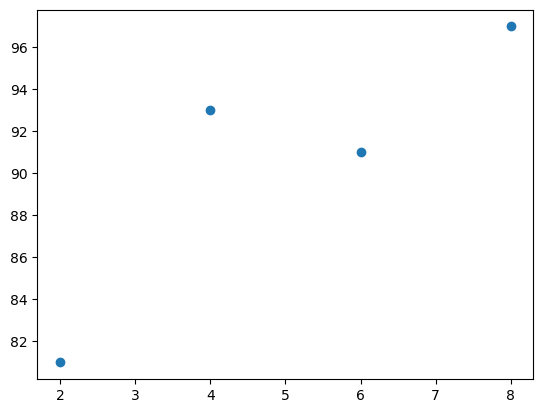

In [34]:
plt.scatter(x, y)
plt.show()

In [40]:
# 기울기 a와 절편 b의 값을 초기화합니다.
a = 0
b = 0

In [41]:
#학습률을 정합니다.
lr = 0.03

In [42]:
#몇 번 반복될지를 설정합니다. 
epochs = 2001

In [43]:
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

In [44]:
x
a * x + b # h(x) = 0 * x + 0 => yhat = [0 0 0 0], y=[81, 93, 91, 97]
# error=y-yhat => 1/4 * sum(square(error)) => cost(loss)
y - (a * x + b)

array([81, 93, 91, 97])

In [45]:
# x 값이 총 몇 개인지 셉니다.
n=len(x)

#경사 하강법을 시작합니다.
for i in range(epochs):                  # epoch 수 만큼 반복
    
    y_pred = a * x + b                   # 예측 값을 구하는 식입니다. 
    error = y - y_pred                   # 실제 값과 비교한 오차를 error로 놓습니다.
    
    a_diff = (2/n) * sum(-x * (error))   # 오차 함수를 a로 편미분한 값입니다. 
    b_diff = (2/n) * sum(-(error))       # 오차 함수를 b로 편미분한 값입니다. 
    
    a = a - lr * a_diff     # 학습률을 곱해 기존의 a 값을 업데이트합니다.
    b = b - lr * b_diff     # 학습률을 곱해 기존의 b 값을 업데이트합니다.
    
    if i % 100 == 0:        # 100번 반복될 때마다 현재의 a 값, b 값을 출력합니다.
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))

epoch=0, 기울기=27.8400, 절편=5.4300
epoch=100, 기울기=7.0739, 절편=50.5117
epoch=200, 기울기=4.0960, 절편=68.2822
epoch=300, 기울기=2.9757, 절편=74.9678
epoch=400, 기울기=2.5542, 절편=77.4830
epoch=500, 기울기=2.3956, 절편=78.4293
epoch=600, 기울기=2.3360, 절편=78.7853
epoch=700, 기울기=2.3135, 절편=78.9192
epoch=800, 기울기=2.3051, 절편=78.9696
epoch=900, 기울기=2.3019, 절편=78.9886
epoch=1000, 기울기=2.3007, 절편=78.9957
epoch=1100, 기울기=2.3003, 절편=78.9984
epoch=1200, 기울기=2.3001, 절편=78.9994
epoch=1300, 기울기=2.3000, 절편=78.9998
epoch=1400, 기울기=2.3000, 절편=78.9999
epoch=1500, 기울기=2.3000, 절편=79.0000
epoch=1600, 기울기=2.3000, 절편=79.0000
epoch=1700, 기울기=2.3000, 절편=79.0000
epoch=1800, 기울기=2.3000, 절편=79.0000
epoch=1900, 기울기=2.3000, 절편=79.0000
epoch=2000, 기울기=2.3000, 절편=79.0000


In [47]:
a
b

78.99999975567644

In [48]:
hx = a*x+b

In [49]:
hx #모델의 예측값

array([83.59999984, 88.19999992, 92.8       , 97.40000008])

In [50]:
y #실제값

array([81, 93, 91, 97])

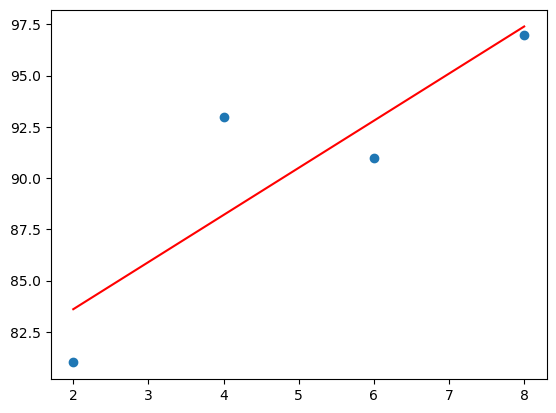

In [53]:
plt.scatter(x, y)
plt.plot(x, hx,'r')
plt.show()

In [ ]:
#로지스틱 회귀모델

In [54]:
x = np.array([2, 4, 6, 8, 10, 12, 14]) #공부시간
y = np.array([0, 0, 0, 1, 1, 1, 1]) #합격 불합격

In [55]:
model = Sequential() # Sequential객체생성

In [56]:
model.add(Dense(1, input_dim=1, activation='sigmoid'))

In [57]:
model.compile(optimizer='sgd' ,loss='binary_crossentropy')
#sgd 보편적인 경사하강법

In [58]:
model.fit(x, y, epochs=5000)

Epoch 1/5000
1/1 [==============================] - 0s 219ms/step - loss: 2.2710
Epoch 2/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.2406
Epoch 3/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.2103
Epoch 4/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.1800
Epoch 5/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.1497
Epoch 6/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.1195
Epoch 7/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.0893
Epoch 8/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.0592
Epoch 9/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.0291
Epoch 10/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.9991
Epoch 11/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.9691
Epoch 12/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.9392
Epoch 13/5000
1/1 [============================

1/1 [==============================] - 0s 6ms/step - loss: 0.5012
Epoch 104/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5010
Epoch 105/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5007
Epoch 106/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5005
Epoch 107/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5003
Epoch 108/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5001
Epoch 109/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4998
Epoch 110/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4996
Epoch 111/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.4994
Epoch 112/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4992
Epoch 113/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4989
Epoch 114/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4987
Epoch 115/5000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 0.4796
Epoch 205/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.4794
Epoch 206/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4792
Epoch 207/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4790
Epoch 208/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4788
Epoch 209/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4786
Epoch 210/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.4784
Epoch 211/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4782
Epoch 212/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4780
Epoch 213/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4778
Epoch 214/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4776
Epoch 215/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4774
Epoch 216/5000
1/1 [=======================

1/1 [==============================] - 0s 4ms/step - loss: 0.4599
Epoch 306/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4597
Epoch 307/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.4595
Epoch 308/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4593
Epoch 309/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4591
Epoch 310/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4589
Epoch 311/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4588
Epoch 312/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.4586
Epoch 313/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4584
Epoch 314/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4582
Epoch 315/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4580
Epoch 316/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4578
Epoch 317/5000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.4417
Epoch 407/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4415
Epoch 408/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4414
Epoch 409/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4412
Epoch 410/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4410
Epoch 411/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.4409
Epoch 412/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4407
Epoch 413/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.4405
Epoch 414/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4403
Epoch 415/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4402
Epoch 416/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4400
Epoch 417/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4398
Epoch 418/5000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 0.4250
Epoch 508/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4248
Epoch 509/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4247
Epoch 510/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4245
Epoch 511/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4244
Epoch 512/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4242
Epoch 513/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.4241
Epoch 514/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4239
Epoch 515/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4237
Epoch 516/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4236
Epoch 517/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4234
Epoch 518/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4233
Epoch 519/5000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 0.4096
Epoch 609/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4095
Epoch 610/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4093
Epoch 611/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4092
Epoch 612/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4090
Epoch 613/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4089
Epoch 614/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4087
Epoch 615/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4086
Epoch 616/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.4084
Epoch 617/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4083
Epoch 618/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4081
Epoch 619/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4080
Epoch 620/5000
1/1 [=======================

1/1 [==============================] - 0s 6ms/step - loss: 0.3954
Epoch 710/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3953
Epoch 711/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3951
Epoch 712/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3950
Epoch 713/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3948
Epoch 714/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3947
Epoch 715/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3946
Epoch 716/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3944
Epoch 717/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3943
Epoch 718/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3942
Epoch 719/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3940
Epoch 720/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3939
Epoch 721/5000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.3822
Epoch 811/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3821
Epoch 812/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3820
Epoch 813/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3819
Epoch 814/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3817
Epoch 815/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3816
Epoch 816/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3815
Epoch 817/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3814
Epoch 818/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3812
Epoch 819/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.3811
Epoch 820/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3810
Epoch 821/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3809
Epoch 822/5000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 0.3701
Epoch 912/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3700
Epoch 913/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3698
Epoch 914/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3697
Epoch 915/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3696
Epoch 916/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3695
Epoch 917/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3694
Epoch 918/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3693
Epoch 919/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3691
Epoch 920/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3690
Epoch 921/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3689
Epoch 922/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3688
Epoch 923/5000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 0.3588
Epoch 1013/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3587
Epoch 1014/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3586
Epoch 1015/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3584
Epoch 1016/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3583
Epoch 1017/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3582
Epoch 1018/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3581
Epoch 1019/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3580
Epoch 1020/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.3579
Epoch 1021/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3578
Epoch 1022/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.3577
Epoch 1023/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3576
Epoch 1024/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.3484
Epoch 1113/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3483
Epoch 1114/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3482
Epoch 1115/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3481
Epoch 1116/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3480
Epoch 1117/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3479
Epoch 1118/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3478
Epoch 1119/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3477
Epoch 1120/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3476
Epoch 1121/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3475
Epoch 1122/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3474
Epoch 1123/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3473
Epoch 1124/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.3387
Epoch 1213/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3386
Epoch 1214/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3385
Epoch 1215/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3384
Epoch 1216/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3383
Epoch 1217/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3382
Epoch 1218/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3381
Epoch 1219/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3380
Epoch 1220/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3379
Epoch 1221/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3378
Epoch 1222/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3377
Epoch 1223/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3377
Epoch 1224/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.3296
Epoch 1313/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3295
Epoch 1314/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3295
Epoch 1315/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3294
Epoch 1316/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3293
Epoch 1317/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3292
Epoch 1318/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3291
Epoch 1319/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3290
Epoch 1320/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3289
Epoch 1321/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3288
Epoch 1322/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3288
Epoch 1323/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3287
Epoch 1324/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.3212
Epoch 1413/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3211
Epoch 1414/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3210
Epoch 1415/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3209
Epoch 1416/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3208
Epoch 1417/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3208
Epoch 1418/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3207
Epoch 1419/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3206
Epoch 1420/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3205
Epoch 1421/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3204
Epoch 1422/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.3204
Epoch 1423/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3203
Epoch 1424/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.3132
Epoch 1513/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3132
Epoch 1514/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3131
Epoch 1515/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3130
Epoch 1516/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3129
Epoch 1517/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3129
Epoch 1518/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3128
Epoch 1519/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3127
Epoch 1520/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3126
Epoch 1521/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3126
Epoch 1522/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3125
Epoch 1523/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3124
Epoch 1524/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.3058
Epoch 1613/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3057
Epoch 1614/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3057
Epoch 1615/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3056
Epoch 1616/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3055
Epoch 1617/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3054
Epoch 1618/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3054
Epoch 1619/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3053
Epoch 1620/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3052
Epoch 1621/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3051
Epoch 1622/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3051
Epoch 1623/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3050
Epoch 1624/5000
1/1 [===========

1/1 [==============================] - 0s 6ms/step - loss: 0.2988
Epoch 1713/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2987
Epoch 1714/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2987
Epoch 1715/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2986
Epoch 1716/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2985
Epoch 1717/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2985
Epoch 1718/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2984
Epoch 1719/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2983
Epoch 1720/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2983
Epoch 1721/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2982
Epoch 1722/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2981
Epoch 1723/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2981
Epoch 1724/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.2922
Epoch 1813/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2921
Epoch 1814/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2921
Epoch 1815/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2920
Epoch 1816/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2920
Epoch 1817/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2919
Epoch 1818/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2918
Epoch 1819/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2918
Epoch 1820/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2917
Epoch 1821/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2916
Epoch 1822/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2916
Epoch 1823/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2915
Epoch 1824/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2860
Epoch 1913/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2859
Epoch 1914/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2859
Epoch 1915/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2858
Epoch 1916/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2857
Epoch 1917/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2857
Epoch 1918/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2856
Epoch 1919/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2856
Epoch 1920/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2855
Epoch 1921/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2854
Epoch 1922/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2854
Epoch 1923/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2853
Epoch 1924/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2801
Epoch 2013/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2801
Epoch 2014/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2800
Epoch 2015/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2799
Epoch 2016/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2799
Epoch 2017/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2798
Epoch 2018/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2798
Epoch 2019/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2797
Epoch 2020/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2797
Epoch 2021/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2796
Epoch 2022/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2795
Epoch 2023/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2795
Epoch 2024/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2746
Epoch 2113/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2745
Epoch 2114/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2745
Epoch 2115/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2744
Epoch 2116/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2743
Epoch 2117/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2743
Epoch 2118/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2742
Epoch 2119/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2742
Epoch 2120/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2741
Epoch 2121/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2741
Epoch 2122/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2740
Epoch 2123/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2740
Epoch 2124/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2693
Epoch 2213/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2692
Epoch 2214/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2692
Epoch 2215/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2691
Epoch 2216/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2691
Epoch 2217/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2690
Epoch 2218/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2690
Epoch 2219/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2689
Epoch 2220/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2689
Epoch 2221/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2688
Epoch 2222/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2688
Epoch 2223/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2687
Epoch 2224/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2643
Epoch 2313/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2642
Epoch 2314/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2642
Epoch 2315/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2642
Epoch 2316/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2641
Epoch 2317/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2641
Epoch 2318/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2640
Epoch 2319/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2640
Epoch 2320/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2639
Epoch 2321/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2639
Epoch 2322/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2638
Epoch 2323/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2638
Epoch 2324/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.2595
Epoch 2413/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2595
Epoch 2414/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2595
Epoch 2415/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2594
Epoch 2416/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2594
Epoch 2417/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2593
Epoch 2418/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2593
Epoch 2419/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2592
Epoch 2420/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2592
Epoch 2421/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2591
Epoch 2422/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2591
Epoch 2423/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2590
Epoch 2424/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2550
Epoch 2513/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2550
Epoch 2514/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2549
Epoch 2515/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2549
Epoch 2516/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2549
Epoch 2517/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2548
Epoch 2518/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2548
Epoch 2519/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2547
Epoch 2520/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2547
Epoch 2521/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2546
Epoch 2522/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2546
Epoch 2523/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2545
Epoch 2524/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.2507
Epoch 2613/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2507
Epoch 2614/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2506
Epoch 2615/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2506
Epoch 2616/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2506
Epoch 2617/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2505
Epoch 2618/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2505
Epoch 2619/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2504
Epoch 2620/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2504
Epoch 2621/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2504
Epoch 2622/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2503
Epoch 2623/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2503
Epoch 2624/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2466
Epoch 2713/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2466
Epoch 2714/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2465
Epoch 2715/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2465
Epoch 2716/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2465
Epoch 2717/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2464
Epoch 2718/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2464
Epoch 2719/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2463
Epoch 2720/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2463
Epoch 2721/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2463
Epoch 2722/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2462
Epoch 2723/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2462
Epoch 2724/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.2427
Epoch 2813/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2427
Epoch 2814/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2426
Epoch 2815/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2426
Epoch 2816/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2426
Epoch 2817/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2425
Epoch 2818/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2425
Epoch 2819/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2424
Epoch 2820/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2424
Epoch 2821/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2424
Epoch 2822/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2423
Epoch 2823/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2423
Epoch 2824/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.2390
Epoch 2913/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2389
Epoch 2914/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2389
Epoch 2915/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2388
Epoch 2916/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2388
Epoch 2917/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2388
Epoch 2918/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2387
Epoch 2919/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2387
Epoch 2920/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2387
Epoch 2921/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2386
Epoch 2922/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2386
Epoch 2923/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2386
Epoch 2924/5000
1/1 [===========

1/1 [==============================] - 0s 5ms/step - loss: 0.2354
Epoch 3013/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2353
Epoch 3014/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2353
Epoch 3015/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2353
Epoch 3016/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2352
Epoch 3017/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2352
Epoch 3018/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2352
Epoch 3019/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2351
Epoch 3020/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2351
Epoch 3021/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2351
Epoch 3022/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2350
Epoch 3023/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2350
Epoch 3024/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2319
Epoch 3113/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2319
Epoch 3114/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2319
Epoch 3115/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2318
Epoch 3116/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2318
Epoch 3117/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2318
Epoch 3118/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2317
Epoch 3119/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2317
Epoch 3120/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2317
Epoch 3121/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2316
Epoch 3122/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2316
Epoch 3123/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2316
Epoch 3124/5000
1/1 [===========

1/1 [==============================] - 0s 5ms/step - loss: 0.2286
Epoch 3213/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2286
Epoch 3214/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2286
Epoch 3215/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2285
Epoch 3216/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2285
Epoch 3217/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2285
Epoch 3218/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2285
Epoch 3219/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2284
Epoch 3220/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2284
Epoch 3221/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2284
Epoch 3222/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2283
Epoch 3223/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2283
Epoch 3224/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2255
Epoch 3313/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2255
Epoch 3314/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2254
Epoch 3315/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2254
Epoch 3316/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2254
Epoch 3317/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2253
Epoch 3318/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2253
Epoch 3319/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2253
Epoch 3320/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2252
Epoch 3321/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2252
Epoch 3322/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2252
Epoch 3323/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2251
Epoch 3324/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2224
Epoch 3413/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2224
Epoch 3414/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2224
Epoch 3415/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2224
Epoch 3416/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2223
Epoch 3417/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2223
Epoch 3418/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2223
Epoch 3419/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2222
Epoch 3420/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2222
Epoch 3421/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2222
Epoch 3422/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2221
Epoch 3423/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2221
Epoch 3424/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2195
Epoch 3513/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2195
Epoch 3514/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2195
Epoch 3515/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2194
Epoch 3516/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2194
Epoch 3517/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2194
Epoch 3518/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2194
Epoch 3519/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2193
Epoch 3520/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2193
Epoch 3521/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2193
Epoch 3522/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2192
Epoch 3523/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2192
Epoch 3524/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2167
Epoch 3613/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2167
Epoch 3614/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2167
Epoch 3615/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2166
Epoch 3616/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2166
Epoch 3617/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2166
Epoch 3618/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2166
Epoch 3619/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2165
Epoch 3620/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2165
Epoch 3621/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2165
Epoch 3622/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2164
Epoch 3623/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2164
Epoch 3624/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2140
Epoch 3713/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2140
Epoch 3714/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2140
Epoch 3715/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2139
Epoch 3716/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2139
Epoch 3717/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2139
Epoch 3718/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2138
Epoch 3719/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2138
Epoch 3720/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2138
Epoch 3721/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2138
Epoch 3722/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2137
Epoch 3723/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2137
Epoch 3724/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2114
Epoch 3813/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2114
Epoch 3814/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2113
Epoch 3815/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2113
Epoch 3816/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2113
Epoch 3817/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2113
Epoch 3818/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2112
Epoch 3819/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2112
Epoch 3820/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2112
Epoch 3821/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2112
Epoch 3822/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2111
Epoch 3823/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2111
Epoch 3824/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2089
Epoch 3913/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2089
Epoch 3914/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2088
Epoch 3915/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2088
Epoch 3916/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2088
Epoch 3917/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2088
Epoch 3918/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2087
Epoch 3919/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2087
Epoch 3920/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2087
Epoch 3921/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2087
Epoch 3922/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2086
Epoch 3923/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2086
Epoch 3924/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2064
Epoch 4013/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2064
Epoch 4014/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2064
Epoch 4015/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2064
Epoch 4016/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2064
Epoch 4017/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2063
Epoch 4018/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2063
Epoch 4019/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2063
Epoch 4020/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2063
Epoch 4021/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2062
Epoch 4022/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2062
Epoch 4023/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2062
Epoch 4024/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.2041
Epoch 4113/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2041
Epoch 4114/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2041
Epoch 4115/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2040
Epoch 4116/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2040
Epoch 4117/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2040
Epoch 4118/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2040
Epoch 4119/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2039
Epoch 4120/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2039
Epoch 4121/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2039
Epoch 4122/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2039
Epoch 4123/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2038
Epoch 4124/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.2018
Epoch 4213/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2018
Epoch 4214/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2018
Epoch 4215/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2018
Epoch 4216/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2017
Epoch 4217/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2017
Epoch 4218/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2017
Epoch 4219/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2017
Epoch 4220/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2016
Epoch 4221/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2016
Epoch 4222/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2016
Epoch 4223/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2016
Epoch 4224/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.1996
Epoch 4313/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1996
Epoch 4314/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1996
Epoch 4315/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1996
Epoch 4316/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1995
Epoch 4317/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1995
Epoch 4318/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.1995
Epoch 4319/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1995
Epoch 4320/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1995
Epoch 4321/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1994
Epoch 4322/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1994
Epoch 4323/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.1994
Epoch 4324/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.1975
Epoch 4413/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1975
Epoch 4414/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1975
Epoch 4415/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1974
Epoch 4416/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1974
Epoch 4417/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1974
Epoch 4418/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1974
Epoch 4419/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1974
Epoch 4420/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1973
Epoch 4421/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1973
Epoch 4422/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1973
Epoch 4423/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1973
Epoch 4424/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.1954
Epoch 4513/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1954
Epoch 4514/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1954
Epoch 4515/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1954
Epoch 4516/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1954
Epoch 4517/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1953
Epoch 4518/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1953
Epoch 4519/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1953
Epoch 4520/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1953
Epoch 4521/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1953
Epoch 4522/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1952
Epoch 4523/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1952
Epoch 4524/5000
1/1 [===========

1/1 [==============================] - 0s 6ms/step - loss: 0.1934
Epoch 4613/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1934
Epoch 4614/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1934
Epoch 4615/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1934
Epoch 4616/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1934
Epoch 4617/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1933
Epoch 4618/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1933
Epoch 4619/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1933
Epoch 4620/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1933
Epoch 4621/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1933
Epoch 4622/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1932
Epoch 4623/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1932
Epoch 4624/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.1915
Epoch 4713/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1915
Epoch 4714/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1915
Epoch 4715/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.1915
Epoch 4716/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1914
Epoch 4717/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1914
Epoch 4718/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1914
Epoch 4719/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1914
Epoch 4720/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1914
Epoch 4721/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1913
Epoch 4722/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1913
Epoch 4723/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.1913
Epoch 4724/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.1896
Epoch 4813/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.1896
Epoch 4814/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1896
Epoch 4815/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.1896
Epoch 4816/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1896
Epoch 4817/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1895
Epoch 4818/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1895
Epoch 4819/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1895
Epoch 4820/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1895
Epoch 4821/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1895
Epoch 4822/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.1894
Epoch 4823/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1894
Epoch 4824/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.1878
Epoch 4913/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1878
Epoch 4914/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1878
Epoch 4915/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1877
Epoch 4916/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1877
Epoch 4917/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1877
Epoch 4918/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.1877
Epoch 4919/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1877
Epoch 4920/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1877
Epoch 4921/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1876
Epoch 4922/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1876
Epoch 4923/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.1876
Epoch 4924/5000
1/1 [===========

1/1 [==============================] - 0s 55ms/step


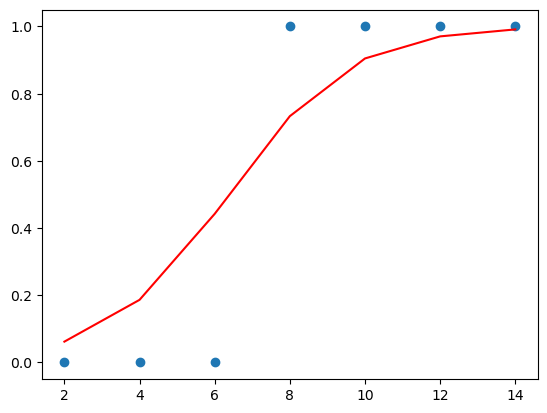

In [59]:
plt.scatter(x, y)
plt.plot(x, model.predict(x),'r')
plt.show()

In [62]:
if model.predict([7])*100 > 50:
    print("합격으로 예상")
else:
    print("불합격으로 예상")

1/1 [==============================] - 0s 32ms/step
합격으로 예상


In [ ]:
#다층 퍼셉트론
#퍼셉트론: 입력값을 입력받아 처리를해서 결과를 도출해내는 역할을 담당
# 신경망에서 뉴런의 역할을 하는것이 퍼셉트론
# 다층 퍼셉트론 연산을하고 다음 뉴런에 전달하는 것, 뉴런을 여러개 이어가는것

In [73]:
# 가중치와 바이어스
w11 = np.array([-2, -2])
w12 = np.array([2, 2])
w2 = np.array([1, 1])
b1 = 3
b2 = -1
b3 = -1

# 퍼셉트론
def MLP(x, w, b):
    y = np.sum(w * x) + b
    if y <= 0:
        return 0
    else:
        return 1

In [79]:
def NAND(x1,x2):
    return MLP(np.array([x1, x2]), w11, b1)

def XOR(x1,x2):
    return AND(NAND(x1, x2),OR(x1,x2))

def AND(x1, x2):
    return MLP(np.array([x1, x2]), w2, b3)

def OR(x1, x2):
    return MLP(np.array([x1, x2]), w12, b2)
    

In [80]:
for x in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    #print(x)
    #y=OR(x[0], x[1]) # 0 1 1 1 
    #y=AND(x[0], x[1]) # 0 0 0 1
    y=XOR(x[0], x[1]) # 0 1 1 0
    print(y)

0
1
1
0


In [ ]:
# XOR은 한개의 퍼셉트론으로 해결 안됨 -여러개의 퍼셉트론으로 해결 해야하며 이를 다층 퍼셉트론이라한다
# 다층 퍼셉트론 = 딥러닝 이라 할수 있다

In [81]:
import seaborn as sns

In [83]:
df = pd.read_csv('datadl2/pima-indians-diabetes3.csv')

In [84]:
df.head(5)

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [85]:
df["diabetes"].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [86]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [92]:
df

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [87]:
df.corr()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


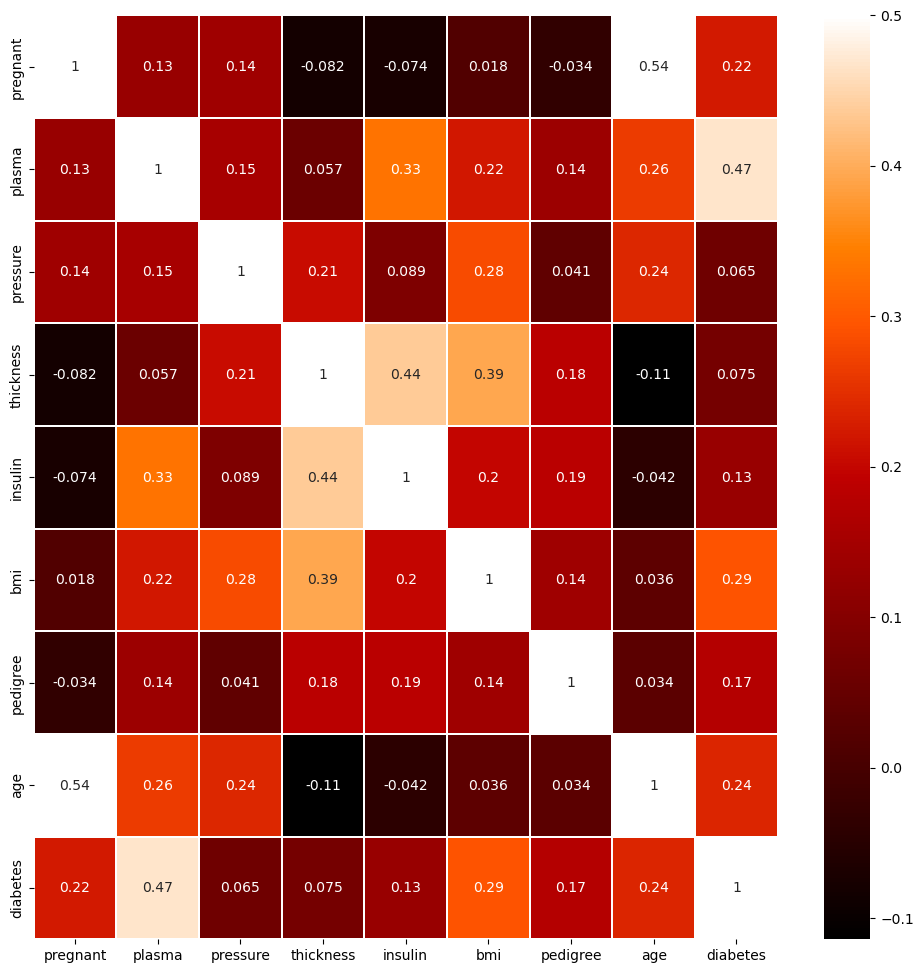

In [88]:
colormap = plt.cm.gist_heat   
plt.figure(figsize=(12,12))  
sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

In [89]:
df.plasma

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: plasma, Length: 768, dtype: int64

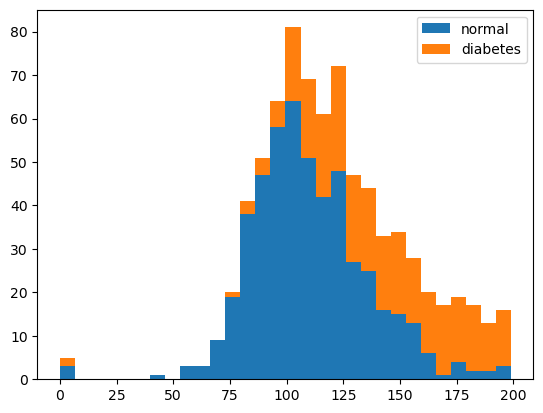

In [90]:
plt.hist(x=[df.plasma[df.diabetes==0], df.plasma[df.diabetes==1]], bins=30, histtype='barstacked', label=['normal','diabetes'])
plt.legend()

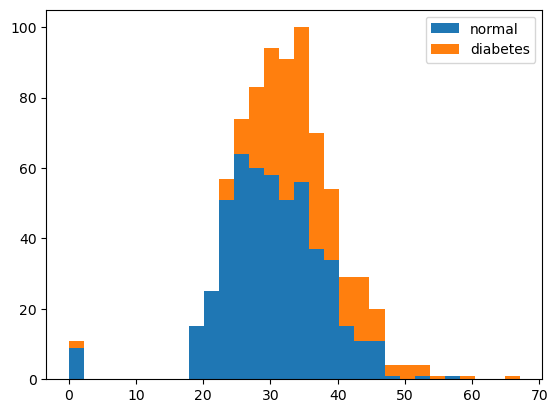

In [91]:
plt.hist(x=[df.bmi[df.diabetes==0], df.bmi[df.diabetes==1]], bins=30, histtype='barstacked', label=['normal','diabetes'])
plt.legend()

In [93]:
X = df.iloc[:,0:8]
y = df.iloc[:,8]

In [94]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64

In [95]:
model = Sequential()

In [96]:
model.add(Dense(12, input_dim=8, activation='relu', name='Dense_1'))
model.add(Dense(8, activation='relu', name='Dense_2'))
model.add(Dense(1, activation='sigmoid',name='Dense_3'))

In [97]:
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 12)                108       
                                                                 
 Dense_2 (Dense)             (None, 8)                 104       
                                                                 
 Dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221 (884.00 Byte)
Trainable params: 221 (884.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [98]:
model.fit(X, y, epochs=100, batch_size=5)

Epoch 1/100
154/154 [==============================] - 1s 1ms/step - loss: 1.6475 - accuracy: 0.5430
Epoch 2/100
154/154 [==============================] - 0s 1ms/step - loss: 0.7354 - accuracy: 0.6341
Epoch 3/100
154/154 [==============================] - 0s 1ms/step - loss: 0.6554 - accuracy: 0.6849
Epoch 4/100
154/154 [==============================] - 0s 1ms/step - loss: 0.6412 - accuracy: 0.6953
Epoch 5/100
154/154 [==============================] - 0s 1ms/step - loss: 0.6278 - accuracy: 0.7044
Epoch 6/100
154/154 [==============================] - 0s 1ms/step - loss: 0.6145 - accuracy: 0.7174
Epoch 7/100
154/154 [==============================] - 0s 1ms/step - loss: 0.6162 - accuracy: 0.7018
Epoch 8/100
154/154 [==============================] - 0s 1ms/step - loss: 0.6027 - accuracy: 0.6979
Epoch 9/100
154/154 [==============================] - 0s 1ms/step - loss: 0.6020 - accuracy: 0.7005
Epoch 10/100
154/154 [==============================] - 0s 1ms/step - loss: 0.5827 - accura

154/154 [==============================] - 0s 1ms/step - loss: 0.4973 - accuracy: 0.7591
Epoch 82/100
154/154 [==============================] - 0s 1ms/step - loss: 0.5040 - accuracy: 0.7448
Epoch 83/100
154/154 [==============================] - 0s 1ms/step - loss: 0.4956 - accuracy: 0.7604
Epoch 84/100
154/154 [==============================] - 0s 1ms/step - loss: 0.4993 - accuracy: 0.7695
Epoch 85/100
154/154 [==============================] - 0s 1ms/step - loss: 0.5031 - accuracy: 0.7539
Epoch 86/100
154/154 [==============================] - 0s 1ms/step - loss: 0.5030 - accuracy: 0.7513
Epoch 87/100
154/154 [==============================] - 0s 1ms/step - loss: 0.5038 - accuracy: 0.7500
Epoch 88/100
154/154 [==============================] - 0s 1ms/step - loss: 0.5027 - accuracy: 0.7461
Epoch 89/100
154/154 [==============================] - 0s 1ms/step - loss: 0.4880 - accuracy: 0.7461
Epoch 90/100
154/154 [==============================] - 0s 1ms/step - loss: 0.4990 - accuracy: 

In [101]:
df = pd.read_csv('datadl2/sonar3.csv', header=None)

df.head()
#암석(0), 광석(1)
#60개의 음파 관련 속성, 광석 여부

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


In [102]:
df[60].value_counts()

1    111
0     97
Name: 60, dtype: int64

In [103]:
X = df.iloc[:,0:60]
y = df.iloc[:,60]

In [104]:
model = Sequential()
model.add(Dense(24,  input_dim=60, activation='relu')) #첫번째 히든층 24
model.add(Dense(10, activation='relu'))  #두번째 히든층 10
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(X, y, epochs=200, batch_size=10)

Epoch 1/200
21/21 [==============================] - 1s 1ms/step - loss: 0.6990 - accuracy: 0.5337
Epoch 2/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6815 - accuracy: 0.6010
Epoch 3/200
21/21 [==============================] - 0s 1ms/step - loss: 0.6699 - accuracy: 0.5721
Epoch 4/200
21/21 [==============================] - 0s 1ms/step - loss: 0.6486 - accuracy: 0.6442
Epoch 5/200
21/21 [==============================] - 0s 1ms/step - loss: 0.6376 - accuracy: 0.6346
Epoch 6/200
21/21 [==============================] - 0s 1ms/step - loss: 0.6193 - accuracy: 0.6971
Epoch 7/200
21/21 [==============================] - 0s 1ms/step - loss: 0.6079 - accuracy: 0.7260
Epoch 8/200
21/21 [==============================] - 0s 1ms/step - loss: 0.5988 - accuracy: 0.6875
Epoch 9/200
21/21 [==============================] - 0s 1ms/step - loss: 0.5773 - accuracy: 0.7548
Epoch 10/200
21/21 [==============================] - 0s 1ms/step - loss: 0.5557 - accuracy: 0.7308
Epoch 11/

21/21 [==============================] - 0s 1ms/step - loss: 0.1851 - accuracy: 0.9327
Epoch 84/200
21/21 [==============================] - 0s 1ms/step - loss: 0.1539 - accuracy: 0.9663
Epoch 85/200
21/21 [==============================] - 0s 1ms/step - loss: 0.1523 - accuracy: 0.9663
Epoch 86/200
21/21 [==============================] - 0s 1ms/step - loss: 0.1624 - accuracy: 0.9615
Epoch 87/200
21/21 [==============================] - 0s 1ms/step - loss: 0.1639 - accuracy: 0.9471
Epoch 88/200
21/21 [==============================] - 0s 1ms/step - loss: 0.1593 - accuracy: 0.9615
Epoch 89/200
21/21 [==============================] - 0s 1ms/step - loss: 0.1376 - accuracy: 0.9615
Epoch 90/200
21/21 [==============================] - 0s 1ms/step - loss: 0.1424 - accuracy: 0.9663
Epoch 91/200
21/21 [==============================] - 0s 1ms/step - loss: 0.1398 - accuracy: 0.9615
Epoch 92/200
21/21 [==============================] - 0s 1ms/step - loss: 0.1341 - accuracy: 0.9808
Epoch 93/200


21/21 [==============================] - 0s 1ms/step - loss: 0.0325 - accuracy: 1.0000
Epoch 165/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0303 - accuracy: 1.0000
Epoch 166/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 1.0000
Epoch 167/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0272 - accuracy: 1.0000
Epoch 168/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0298 - accuracy: 1.0000
Epoch 169/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0246 - accuracy: 1.0000
Epoch 170/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0310 - accuracy: 1.0000
Epoch 171/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0401 - accuracy: 1.0000
Epoch 172/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0315 - accuracy: 0.9952
Epoch 173/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0236 - accuracy: 1.0000
Epoc

In [105]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

import pandas as pd

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
#train데이터와 test데이터를 7:3의 비율로 나눔

In [107]:
X_train.shape

(145, 60)

In [111]:
y_train
y_train.value_counts()

1    78
0    67
Name: 60, dtype: int64

In [ ]:
# 전체데이터가 1:70%, 0:30% 비율이라면
#         => 1과 0이 train(7:3), test(7:3)의 비율로 나눠진다

In [112]:
model = Sequential()
model.add(Dense(24,  input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [113]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(X_train, y_train, epochs=200, batch_size=10)

Epoch 1/200
15/15 [==============================] - 1s 2ms/step - loss: 0.6890 - accuracy: 0.5379
Epoch 2/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6827 - accuracy: 0.5379
Epoch 3/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6793 - accuracy: 0.5379
Epoch 4/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6771 - accuracy: 0.5379
Epoch 5/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6743 - accuracy: 0.5379
Epoch 6/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6716 - accuracy: 0.5379
Epoch 7/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6675 - accuracy: 0.5379
Epoch 8/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6640 - accuracy: 0.5379
Epoch 9/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6597 - accuracy: 0.5379
Epoch 10/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6531 - accuracy: 0.5379
Epoch 11/

15/15 [==============================] - 0s 1ms/step - loss: 0.2829 - accuracy: 0.8828
Epoch 84/200
15/15 [==============================] - 0s 1ms/step - loss: 0.2858 - accuracy: 0.8897
Epoch 85/200
15/15 [==============================] - 0s 1ms/step - loss: 0.2807 - accuracy: 0.8828
Epoch 86/200
15/15 [==============================] - 0s 1ms/step - loss: 0.2790 - accuracy: 0.9034
Epoch 87/200
15/15 [==============================] - 0s 1ms/step - loss: 0.2767 - accuracy: 0.8828
Epoch 88/200
15/15 [==============================] - 0s 1ms/step - loss: 0.2772 - accuracy: 0.8828
Epoch 89/200
15/15 [==============================] - 0s 1ms/step - loss: 0.2752 - accuracy: 0.8690
Epoch 90/200
15/15 [==============================] - 0s 1ms/step - loss: 0.2739 - accuracy: 0.9034
Epoch 91/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2737 - accuracy: 0.8621
Epoch 92/200
15/15 [==============================] - 0s 1ms/step - loss: 0.2644 - accuracy: 0.8897
Epoch 93/200


15/15 [==============================] - 0s 1ms/step - loss: 0.1443 - accuracy: 0.9586
Epoch 165/200
15/15 [==============================] - 0s 1ms/step - loss: 0.1427 - accuracy: 0.9586
Epoch 166/200
15/15 [==============================] - 0s 2ms/step - loss: 0.1426 - accuracy: 0.9517
Epoch 167/200
15/15 [==============================] - 0s 2ms/step - loss: 0.1411 - accuracy: 0.9517
Epoch 168/200
15/15 [==============================] - 0s 1ms/step - loss: 0.1450 - accuracy: 0.9586
Epoch 169/200
15/15 [==============================] - 0s 1ms/step - loss: 0.1450 - accuracy: 0.9586
Epoch 170/200
15/15 [==============================] - 0s 1ms/step - loss: 0.1410 - accuracy: 0.9586
Epoch 171/200
15/15 [==============================] - 0s 1ms/step - loss: 0.1378 - accuracy: 0.9517
Epoch 172/200
15/15 [==============================] - 0s 1ms/step - loss: 0.1359 - accuracy: 0.9586
Epoch 173/200
15/15 [==============================] - 0s 1ms/step - loss: 0.1416 - accuracy: 0.9517
Epoc

In [116]:
score=model.evaluate(X_test, y_test)
score

2/2 [==============================] - 0s 3ms/step - loss: 0.5070 - accuracy: 0.8571


[0.5069595575332642, 0.8571428656578064]

In [117]:
model.save("myModel.hdf5") #메모리에 있는 모델을 파일로저장, 이파일을 서버에 올리면됨

C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [118]:
del model #모델 제거

In [120]:
myModel=load_model("myModel.hdf5")#모델 불러오기
#훈련이 끝난 모델을 pretrained model 이라고 한다

In [121]:
myModel.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.5070 - accuracy: 0.8571


[0.5069595575332642, 0.8571428656578064]

In [ ]:
# myModel.predict([xdata]) -> 에측값 출력

In [ ]:
# myModel:광산/암산 구분 모델(사전 학습된 모델)

In [ ]:
#해저 천연자원(가스) 탐사 프로젝트
#데이터 구성되어 있음

# myModel -> 불러오기 -> +해저 천연자원 데이터 추가학습 -> 해저 천연자원 분류 모델 =>전이학습(파인튜닝)

In [124]:
df = pd.read_csv('datadl2/wine.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [125]:
X = df.iloc[:,0:12]
y = df.iloc[:,12]

In [126]:
y.value_counts()

0    4898
1    1599
Name: 12, dtype: int64

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [128]:
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 30)                390       
                                                                 
 dense_13 (Dense)            (None, 12)                372       
                                                                 
 dense_14 (Dense)            (None, 8)                 104       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 전체데이터 6497건 데이터를 8:2비율로 나눔 train(8),test(2)
# ex) 10000건
# train(80)8000건                                    test(20)2000건
# train(0.75(6000건) / validation(0.25(2000건))

In [129]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [130]:
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25) # 0.8 x 0.25 = 0.2

Epoch 1/50
8/8 [==============================] - 1s 21ms/step - loss: 7.7665 - accuracy: 0.2430 - val_loss: 1.6358 - val_accuracy: 0.2385
Epoch 2/50
8/8 [==============================] - 0s 5ms/step - loss: 0.6083 - accuracy: 0.7062 - val_loss: 0.3444 - val_accuracy: 0.8654
Epoch 3/50
8/8 [==============================] - 0s 5ms/step - loss: 0.3743 - accuracy: 0.8517 - val_loss: 0.4112 - val_accuracy: 0.8523
Epoch 4/50
8/8 [==============================] - 0s 5ms/step - loss: 0.3903 - accuracy: 0.8542 - val_loss: 0.3740 - val_accuracy: 0.8700
Epoch 5/50
8/8 [==============================] - 0s 6ms/step - loss: 0.3300 - accuracy: 0.8779 - val_loss: 0.2917 - val_accuracy: 0.8946
Epoch 6/50
8/8 [==============================] - 0s 5ms/step - loss: 0.2630 - accuracy: 0.9117 - val_loss: 0.2518 - val_accuracy: 0.9231
Epoch 7/50
8/8 [==============================] - 0s 5ms/step - loss: 0.2525 - accuracy: 0.9243 - val_loss: 0.2516 - val_accuracy: 0.9223
Epoch 8/50
8/8 [=================

In [131]:
model.evaluate(X_test, y_test) #실전 테스트데이터로 평가

41/41 [==============================] - 0s 1ms/step - loss: 0.1578 - accuracy: 0.9377


[0.15780918300151825, 0.9376922845840454]

In [138]:
#모델의 최적 상태 저장

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 30)                390       
                                                                 
 dense_17 (Dense)            (None, 12)                372       
                                                                 
 dense_18 (Dense)            (None, 8)                 104       
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [140]:
modelpath="./datadl2/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"

In [141]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [142]:
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1) #verbose트레이닝하는과정 메세지로 출력하냐안하냐..

In [143]:
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])
# callbacks의 값을 미리 저장해둔 checkpointer로 


Epoch 1: saving model to ./datadl2/model/all\01-0.2169.hdf5

Epoch 2: saving model to ./datadl2/model/all\02-0.2169.hdf5

Epoch 3: saving model to ./datadl2/model/all\03-0.2169.hdf5

Epoch 4: saving model to ./datadl2/model/all\04-0.4054.hdf5


C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 5: saving model to ./datadl2/model/all\05-0.8623.hdf5

Epoch 6: saving model to ./datadl2/model/all\06-0.8762.hdf5

Epoch 7: saving model to ./datadl2/model/all\07-0.9108.hdf5

Epoch 8: saving model to ./datadl2/model/all\08-0.9269.hdf5

Epoch 9: saving model to ./datadl2/model/all\09-0.9285.hdf5

Epoch 10: saving model to ./datadl2/model/all\10-0.9346.hdf5

Epoch 11: saving model to ./datadl2/model/all\11-0.9354.hdf5

Epoch 12: saving model to ./datadl2/model/all\12-0.9362.hdf5

Epoch 13: saving model to ./datadl2/model/all\13-0.9369.hdf5

Epoch 14: saving model to ./datadl2/model/all\14-0.9369.hdf5

Epoch 15: saving model to ./datadl2/model/all\15-0.9377.hdf5

Epoch 16: saving model to ./datadl2/model/all\16-0.9377.hdf5

Epoch 17: saving model to ./datadl2/model/all\17-0.9377.hdf5

Epoch 18: saving model to ./datadl2/model/all\18-0.9392.hdf5

Epoch 19: saving model to ./datadl2/model/all\19-0.9385.hdf5

Epoch 20: saving model to ./datadl2/model/all\20-0.9377.hdf5

Epoch 21: sa

In [144]:
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 1ms/step - loss: 0.1447 - accuracy: 0.9469
Test accuracy: 0.9469230771064758


In [145]:
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, verbose=0, validation_split=0.25)

In [146]:
hist_df=pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.129077,0.952014,0.141416,0.947692
1,0.127574,0.952271,0.140494,0.948462
2,0.126132,0.951501,0.141050,0.947692
3,0.124725,0.952271,0.138456,0.947692
4,0.123360,0.953811,0.137089,0.947692
...,...,...,...,...
1995,0.023122,0.992302,0.070347,0.984615
1996,0.031845,0.988709,0.057225,0.986923
1997,0.024856,0.991275,0.059134,0.982308
1998,0.027208,0.991019,0.051299,0.984615


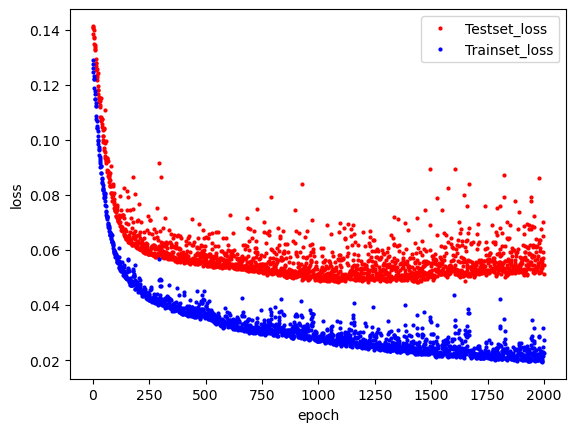

In [147]:
y_vloss=hist_df['val_loss']
y_loss=hist_df['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
#validation date에 대한 loss가 더이상 나아질 기미가 없이 loss가 올라가고 정확도가 낮아지는 시점이 있는데 그 이전에 중단하는것이 좋다
# = early stop 옵션 있음

In [148]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping #좋은모델저장, 조기중단
import os
import pandas as pd

# 데이터를 입력합니다.
df = pd.read_csv('datadl2/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 30)                390       
                                                                 
 dense_21 (Dense)            (None, 12)                372       
                                                                 
 dense_22 (Dense)            (None, 8)                 104       
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [150]:
# 학습이 언제 자동 중단 될지를 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

#최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath="./datadl2/model/Ch14-4-bestmodel.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

#모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0534 - accuracy: 0.9823 - val_loss: 0.0434 - val_accuracy: 0.9854
Epoch 2/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0487 - accuracy: 0.9854 - val_loss: 0.0430 - val_accuracy: 0.9885
Epoch 3/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0535 - accuracy: 0.9841 - val_loss: 0.0434 - val_accuracy: 0.9885
Epoch 4/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0512 - accuracy: 0.9838 - val_loss: 0.0495 - val_accuracy: 0.9846


C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 5/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0518 - accuracy: 0.9838 - val_loss: 0.0496 - val_accuracy: 0.9846
Epoch 6/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0502 - accuracy: 0.9846 - val_loss: 0.0449 - val_accuracy: 0.9885
Epoch 7/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0491 - accuracy: 0.9861 - val_loss: 0.0422 - val_accuracy: 0.9869
Epoch 8/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0471 - accuracy: 0.9859 - val_loss: 0.0513 - val_accuracy: 0.9838
Epoch 9/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0502 - accuracy: 0.9849 - val_loss: 0.0446 - val_accuracy: 0.9892
Epoch 10/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0470 - accuracy: 0.9864 - val_loss: 0.0421 - val_accuracy: 0.9838
Epoch 11/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0482 - accuracy: 0.9861 - val_loss: 0.0418 - val_accuracy: 0.9854
Epoch 12/2000
8/8 

In [152]:
model.evaluate(X_test, y_test)

41/41 [==============================] - 0s 1ms/step - loss: 0.0520 - accuracy: 0.9869


[0.052029430866241455, 0.986923098564148]

In [238]:
df=pd.read_csv("wdbc.data", header=None)
#B(양):0, M(악):1
#트레인:0번~450번까지 데이터
#테스트:451~568버까지 데이터
#딥러닝 모델 생성 -> 정확도 향상

In [239]:
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    object 
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

In [240]:
df = df.replace({'M' : 1, 'B' : 0})

In [223]:
# df[1][df[1] == "M"]=1
# df[1][df[1] == "B"]=0

In [241]:
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [242]:
train = df.iloc[:451,1:]
test = df.iloc[451:,1:]

In [243]:
train

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.12380,0.1866,0.2416,0.18600,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.14440,0.4245,0.4504,0.24300,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,1,17.75,28.03,117.30,981.6,0.09997,0.13140,0.16980,0.08293,0.1713,...,21.53,38.54,145.40,1437.0,0.14010,0.3762,0.6399,0.19700,0.2972,0.09075
447,0,14.80,17.66,95.88,674.8,0.09179,0.08890,0.04069,0.02260,0.1893,...,16.43,22.74,105.90,829.5,0.12260,0.1881,0.2060,0.08308,0.3600,0.07285
448,0,14.53,19.34,94.25,659.7,0.08388,0.07800,0.08817,0.02925,0.1473,...,16.30,28.39,108.10,830.5,0.10890,0.2649,0.3779,0.09594,0.2471,0.07463
449,1,21.10,20.52,138.10,1384.0,0.09684,0.11750,0.15720,0.11550,0.1554,...,25.68,32.07,168.20,2022.0,0.13680,0.3101,0.4399,0.22800,0.2268,0.07425


In [244]:
x_train = train.loc[:, 2:]

In [245]:
x_train

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.12380,0.1866,0.2416,0.18600,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.14440,0.4245,0.4504,0.24300,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,17.75,28.03,117.30,981.6,0.09997,0.13140,0.16980,0.08293,0.1713,0.05916,...,21.53,38.54,145.40,1437.0,0.14010,0.3762,0.6399,0.19700,0.2972,0.09075
447,14.80,17.66,95.88,674.8,0.09179,0.08890,0.04069,0.02260,0.1893,0.05886,...,16.43,22.74,105.90,829.5,0.12260,0.1881,0.2060,0.08308,0.3600,0.07285
448,14.53,19.34,94.25,659.7,0.08388,0.07800,0.08817,0.02925,0.1473,0.05746,...,16.30,28.39,108.10,830.5,0.10890,0.2649,0.3779,0.09594,0.2471,0.07463
449,21.10,20.52,138.10,1384.0,0.09684,0.11750,0.15720,0.11550,0.1554,0.05661,...,25.68,32.07,168.20,2022.0,0.13680,0.3101,0.4399,0.22800,0.2268,0.07425


In [246]:
y_train = train.loc[:, 1]

In [247]:
y_train

0      1
1      1
2      1
3      1
4      1
      ..
446    1
447    0
448    0
449    1
450    0
Name: 1, Length: 451, dtype: int64

In [248]:
x_test= test.loc[:, 2:]
y_test= test. loc[:, 1]

In [249]:
x_test

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
451,19.59,25.00,127.70,1191.0,0.10320,0.09871,0.16550,0.09063,0.1663,0.05391,...,21.440,30.96,139.80,1421.0,0.15280,0.18450,0.39770,0.14660,0.2293,0.06091
452,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,0.06104,...,13.090,37.88,85.07,523.7,0.12080,0.18560,0.18110,0.07116,0.2447,0.08194
453,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,0.1650,0.06121,...,15.800,16.93,103.10,749.9,0.13470,0.14780,0.13730,0.10690,0.2606,0.07810
454,12.62,17.15,80.62,492.9,0.08583,0.05430,0.02966,0.02272,0.1799,0.05826,...,14.340,22.15,91.62,633.5,0.12250,0.15170,0.18870,0.09851,0.3270,0.07330
455,13.38,30.72,86.34,557.2,0.09245,0.07426,0.02819,0.03264,0.1375,0.06016,...,15.050,41.61,96.69,705.6,0.11720,0.14210,0.07003,0.07763,0.2196,0.07675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.93870,0.26500,0.4087,0.12400


In [250]:
y_test

451    1
452    0
453    0
454    0
455    0
      ..
564    1
565    1
566    1
567    1
568    0
Name: 1, Length: 118, dtype: int64

In [251]:
# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=30, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 30)                930       
                                                                 
 dense_33 (Dense)            (None, 12)                372       
                                                                 
 dense_34 (Dense)            (None, 8)                 104       
                                                                 
 dense_35 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1415 (5.53 KB)
Trainable params: 1415 (5.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [252]:
# 학습이 언제 자동 중단 될지를 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20) #patience 최적이후로 20번정도 더가봄

#최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath="./data2/model/Ch14-4-bestmodel.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

#모델을 실행합니다.
history=model.fit(x_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/2000
1/1 [==============================] - 1s 738ms/step - loss: 0.7150 - accuracy: 0.6834 - val_loss: 0.5805 - val_accuracy: 0.8584
Epoch 2/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.7508 - accuracy: 0.8462 - val_loss: 0.5902 - val_accuracy: 0.8230
Epoch 3/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.6704 - accuracy: 0.8491 - val_loss: 0.6832 - val_accuracy: 0.6549
Epoch 4/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.6266 - accuracy: 0.7840 - val_loss: 0.7583 - val_accuracy: 0.5841
Epoch 5/2000
1/1 [==============================] - 0s 29ms/step - loss: 0.6289 - accuracy: 0.7101 - val_loss: 0.7499 - val_accuracy: 0.5841
Epoch 6/2000
1/1 [==============================] - 0s 23ms/step - loss: 0.6016 - accuracy: 0.7101 - val_loss: 0.6870 - val_accuracy: 0.6283
Epoch 7/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.5529 - accuracy: 0.7544 - val_loss: 0.5835 - val_accuracy: 0.7080
Epoch 8/2000

C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 49ms/step - loss: 0.5014 - accuracy: 0.8432 - val_loss: 0.4737 - val_accuracy: 0.8407
Epoch 9/2000
1/1 [==============================] - 0s 51ms/step - loss: 0.4759 - accuracy: 0.8728 - val_loss: 0.4375 - val_accuracy: 0.8761
Epoch 10/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.4799 - accuracy: 0.8876 - val_loss: 0.4397 - val_accuracy: 0.8761
Epoch 11/2000
1/1 [==============================] - 0s 30ms/step - loss: 0.4621 - accuracy: 0.8817 - val_loss: 0.4671 - val_accuracy: 0.8319
Epoch 12/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.4448 - accuracy: 0.8757 - val_loss: 0.4984 - val_accuracy: 0.7788
Epoch 13/2000
1/1 [==============================] - 0s 23ms/step - loss: 0.4412 - accuracy: 0.8728 - val_loss: 0.5050 - val_accuracy: 0.7699
Epoch 14/2000
1/1 [==============================] - 0s 23ms/step - loss: 0.4373 - accuracy: 0.8698 - val_loss: 0.4829 - val_accuracy: 0.7788
Epoch 15/2000
1/1 [==

Epoch 66/2000
1/1 [==============================] - 0s 43ms/step - loss: 0.1880 - accuracy: 0.9231 - val_loss: 0.2174 - val_accuracy: 0.9381
Epoch 67/2000
1/1 [==============================] - 0s 48ms/step - loss: 0.1873 - accuracy: 0.9231 - val_loss: 0.2136 - val_accuracy: 0.9381
Epoch 68/2000
1/1 [==============================] - 0s 48ms/step - loss: 0.1866 - accuracy: 0.9231 - val_loss: 0.2113 - val_accuracy: 0.9381
Epoch 69/2000
1/1 [==============================] - 0s 46ms/step - loss: 0.1860 - accuracy: 0.9231 - val_loss: 0.2112 - val_accuracy: 0.9381
Epoch 70/2000
1/1 [==============================] - 0s 21ms/step - loss: 0.1853 - accuracy: 0.9260 - val_loss: 0.2123 - val_accuracy: 0.9381
Epoch 71/2000
1/1 [==============================] - 0s 23ms/step - loss: 0.1847 - accuracy: 0.9260 - val_loss: 0.2122 - val_accuracy: 0.9381
Epoch 72/2000
1/1 [==============================] - 0s 46ms/step - loss: 0.1842 - accuracy: 0.9260 - val_loss: 0.2095 - val_accuracy: 0.9381
Epoch 

1/1 [==============================] - 0s 48ms/step - loss: 0.1650 - accuracy: 0.9349 - val_loss: 0.1912 - val_accuracy: 0.9381
Epoch 124/2000
1/1 [==============================] - 0s 49ms/step - loss: 0.1648 - accuracy: 0.9349 - val_loss: 0.1904 - val_accuracy: 0.9381
Epoch 125/2000
1/1 [==============================] - 0s 49ms/step - loss: 0.1646 - accuracy: 0.9349 - val_loss: 0.1902 - val_accuracy: 0.9381
Epoch 126/2000
1/1 [==============================] - 0s 23ms/step - loss: 0.1644 - accuracy: 0.9349 - val_loss: 0.1904 - val_accuracy: 0.9381
Epoch 127/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.1641 - accuracy: 0.9349 - val_loss: 0.1904 - val_accuracy: 0.9292
Epoch 128/2000
1/1 [==============================] - 0s 50ms/step - loss: 0.1639 - accuracy: 0.9349 - val_loss: 0.1898 - val_accuracy: 0.9292
Epoch 129/2000
1/1 [==============================] - 0s 48ms/step - loss: 0.1637 - accuracy: 0.9349 - val_loss: 0.1890 - val_accuracy: 0.9381
Epoch 130/2000

1/1 [==============================] - 0s 52ms/step - loss: 0.1545 - accuracy: 0.9320 - val_loss: 0.1787 - val_accuracy: 0.9292
Epoch 181/2000
1/1 [==============================] - 0s 49ms/step - loss: 0.1544 - accuracy: 0.9320 - val_loss: 0.1779 - val_accuracy: 0.9292
Epoch 182/2000
1/1 [==============================] - 0s 23ms/step - loss: 0.1542 - accuracy: 0.9320 - val_loss: 0.1784 - val_accuracy: 0.9292
Epoch 183/2000
1/1 [==============================] - 0s 22ms/step - loss: 0.1540 - accuracy: 0.9320 - val_loss: 0.1790 - val_accuracy: 0.9204
Epoch 184/2000
1/1 [==============================] - 0s 23ms/step - loss: 0.1539 - accuracy: 0.9320 - val_loss: 0.1786 - val_accuracy: 0.9204
Epoch 185/2000
1/1 [==============================] - 0s 22ms/step - loss: 0.1537 - accuracy: 0.9320 - val_loss: 0.1790 - val_accuracy: 0.9204
Epoch 186/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.1536 - accuracy: 0.9320 - val_loss: 0.1792 - val_accuracy: 0.9204
Epoch 187/2000

1/1 [==============================] - 0s 45ms/step - loss: 0.1455 - accuracy: 0.9320 - val_loss: 0.1680 - val_accuracy: 0.9292
Epoch 238/2000
1/1 [==============================] - 0s 47ms/step - loss: 0.1454 - accuracy: 0.9320 - val_loss: 0.1674 - val_accuracy: 0.9292
Epoch 239/2000
1/1 [==============================] - 0s 22ms/step - loss: 0.1452 - accuracy: 0.9320 - val_loss: 0.1717 - val_accuracy: 0.9204
Epoch 240/2000
1/1 [==============================] - 0s 22ms/step - loss: 0.1451 - accuracy: 0.9320 - val_loss: 0.1701 - val_accuracy: 0.9204
Epoch 241/2000
1/1 [==============================] - 0s 29ms/step - loss: 0.1449 - accuracy: 0.9320 - val_loss: 0.1682 - val_accuracy: 0.9292
Epoch 242/2000
1/1 [==============================] - 0s 49ms/step - loss: 0.1448 - accuracy: 0.9320 - val_loss: 0.1669 - val_accuracy: 0.9292
Epoch 243/2000
1/1 [==============================] - 0s 22ms/step - loss: 0.1447 - accuracy: 0.9320 - val_loss: 0.1704 - val_accuracy: 0.9204
Epoch 244/2000

1/1 [==============================] - 0s 25ms/step - loss: 0.1382 - accuracy: 0.9379 - val_loss: 0.1656 - val_accuracy: 0.9204
Epoch 295/2000
1/1 [==============================] - 0s 23ms/step - loss: 0.1382 - accuracy: 0.9349 - val_loss: 0.1608 - val_accuracy: 0.9292
Epoch 296/2000
1/1 [==============================] - 0s 22ms/step - loss: 0.1379 - accuracy: 0.9379 - val_loss: 0.1591 - val_accuracy: 0.9292
Epoch 297/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.1378 - accuracy: 0.9408 - val_loss: 0.1631 - val_accuracy: 0.9204
Epoch 298/2000
1/1 [==============================] - 0s 22ms/step - loss: 0.1377 - accuracy: 0.9379 - val_loss: 0.1625 - val_accuracy: 0.9204
Epoch 299/2000
1/1 [==============================] - 0s 29ms/step - loss: 0.1375 - accuracy: 0.9379 - val_loss: 0.1585 - val_accuracy: 0.9292
Epoch 300/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.1375 - accuracy: 0.9408 - val_loss: 0.1603 - val_accuracy: 0.9292
Epoch 301/2000

1/1 [==============================] - 0s 22ms/step - loss: 0.1318 - accuracy: 0.9349 - val_loss: 0.1522 - val_accuracy: 0.9292
Epoch 352/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.1317 - accuracy: 0.9408 - val_loss: 0.1528 - val_accuracy: 0.9292


In [253]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 0.2129 - accuracy: 0.9237


[0.21288879215717316, 0.9237288236618042]